## 특징공학

#####  데이터 형태

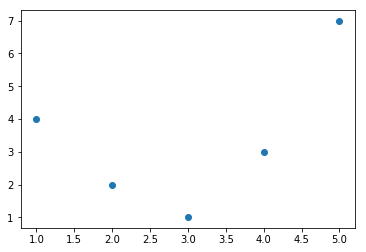

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)

##### LinearRegression

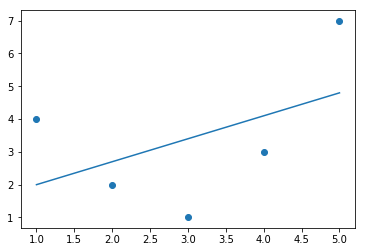

In [11]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit)

##### PolynomialFreatures
* 모델을 바꾸지 않고 입력값을 변환해서 모델을 개선 / 커널법

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


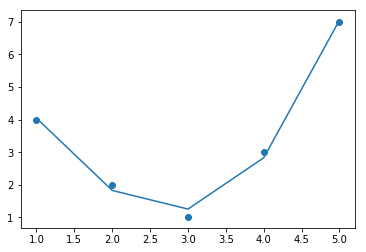

In [17]:
model = LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit)

#####  Imputer

In [22]:
from numpy import nan
X = np.array([[nan, 0, 3],
              [3,7,0],
              [3,5,2],
              [4,nan,6],
              [8,8,1]])
y= np.array([14,16,-1,8,-5])

* 누락된 값이 해당 열의 나머지 값들의 평균으로 대체됐다.

In [21]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 0. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

##### pipeline
* 1. 누락된 값을 평균으로 대체한다.
* 2. 특징을 이차 형태로 전환한다.
* 3. 선형 회귀를 적합시킨다.

In [26]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression())
model.fit(X,y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


##### one_hot_encoding

In [27]:
data = [
    {'price':85000, 'rooms':4, 'neighborhood':'Queen'},
    {'price':75000, 'rooms':3, 'neighborhood':'Fremont'},
    {'price':70000, 'rooms':3, 'neighborhood':'Wallingford'},
    {'price':65000, 'rooms':2, 'neighborhood':'Fremont'}
]